In [2]:
#!pip3 install pymongo[srv]
#!pip install pymongo[tls]

import requests
from bs4 import BeautifulSoup as soup
from selenium import webdriver

numeros = []
textCenter = []
textRight = []

def numeroConcurso(numero):
    
    options = webdriver.FirefoxOptions()
    options.headless = True
    
    url = 'https://www.loteriaseresultados.com.br/index.php/megasena/concurso/'+numero
   # driver = webdriver.Chrome()
    driver = webdriver.Firefox(executable_path = r'/home/alyson/anaconda3/bin/geckodriver-v0.29.0-linux64/geckodriver', options = options)
    driver.get(url)
    
    try: 
        # uma opção é obter todo o body (ou parte mais específica) da página com o selenium/webdriver e passar ao BSoup para análise padrão
        body = driver.find_element_by_tag_name('body')
        html = body.get_attribute('innerHTML')
        soupPage = soup(html, 'html5lib')
        spanList = soupPage.findAll( "span", class_='white--text font-weight-bold')
        
        textCenter.append(soupPage.findAll( 'td', class_='text-center'))
        textRight.append(soupPage.findAll( 'td', class_='text-right'))
        
        for n in range(len(spanList)):
            numeros.append(spanList[n].text)
            print(spanList[n].text)
   
    except:
        print('criterio nao encontrado')

    print('Terminei a raspagem de dados')
    driver.close()

    
numero = "2334"
numeroConcurso(numero)


04
13
20
22
25
60
Terminei a raspagem de dados


In [455]:
# Questão 1
from pymongo import MongoClient
localConn = MongoClient('mongodb://127.0.0.1:27017')

db = localConn.concursos
tb = db.megasena

tb.insert_one({"Numero": numeros}) 



In [456]:
# Questão 2
jogoGanhadores = textCenter[0];
valor = textRight[0];
tb.insert_one({numero: {
        "Numeros": numeros,
        jogoGanhadores[0].text: {'ganhadores': str(jogoGanhadores[1].text),
                                 'valor': str(valor[0].text)},
        jogoGanhadores[2].text: {'ganhadores': str(jogoGanhadores[3].text),
                                 'valor': str(valor[1].text)},
        jogoGanhadores[4].text: {'ganhadores': str(jogoGanhadores[5].text),
                                 'valor': str(valor[2].text)}}
    })

In [457]:
# tb.drop()
lista = list(tb.find({}))
lista

[{'_id': ObjectId('604b6f5ef31382c303bdcdd2'),
  'Numero': ['04', '13', '20', '22', '25', '60']},
 {'_id': ObjectId('604b6f61f31382c303bdcdd3'),
  '2334': {'Numeros': ['04', '13', '20', '22', '25', '60'],
   'SENA': {'ganhadores': '1 ganhador', 'valor': 'R$ 11.854.874,71'},
   'QUINA': {'ganhadores': '66 ganhadores', 'valor': 'R$ 34.602,68'},
   'QUADRA': {'ganhadores': '4.609 ganhadores', 'valor': 'R$ 707,86'}}}]

In [65]:
# Questão 3 
# sudo apt-get install firefox-geckodriver

import requests
from bs4 import BeautifulSoup
from selenium import webdriver

url = 'https://ufrn.br/imprensa/noticias/filtros?text=eaj#&page=1'
option = webdriver.FirefoxOptions()
option.headless = True
driver = webdriver.Firefox()
driver.get(url)
content= driver.page_source
soup = BeautifulSoup(content)

a = soup.findAll("a",class_='blue-link')

srt = 'resultados em Notícias'
qtdResultados = soup.find("h1",{"id":'qtd-resultados'}).text.strip(srt)
# print(qtdResultados)
# print(a)


In [72]:
links = []
for i in range(2, len(a)):
    resultado = a[i]
    links.append(resultado["href"])
        
    

In [95]:
qtdResultados = int(qtdResultados)
paginas = (qtdResultados//10) + 1
ultimaPagina = (qtdResultados%10)

print(paginas)
print(ultimaPagina)

for i in range(paginas):
    print(f'https://ufrn.br/imprensa/noticias/filtros?text=eaj#&page={i+1}')

print("\n\n\n")    

for i in range(9):
    print(f'https://ufrn.br/{links[i]}')


14
7
https://ufrn.br/imprensa/noticias/filtros?text=eaj#&page=1
https://ufrn.br/imprensa/noticias/filtros?text=eaj#&page=2
https://ufrn.br/imprensa/noticias/filtros?text=eaj#&page=3
https://ufrn.br/imprensa/noticias/filtros?text=eaj#&page=4
https://ufrn.br/imprensa/noticias/filtros?text=eaj#&page=5
https://ufrn.br/imprensa/noticias/filtros?text=eaj#&page=6
https://ufrn.br/imprensa/noticias/filtros?text=eaj#&page=7
https://ufrn.br/imprensa/noticias/filtros?text=eaj#&page=8
https://ufrn.br/imprensa/noticias/filtros?text=eaj#&page=9
https://ufrn.br/imprensa/noticias/filtros?text=eaj#&page=10
https://ufrn.br/imprensa/noticias/filtros?text=eaj#&page=11
https://ufrn.br/imprensa/noticias/filtros?text=eaj#&page=12
https://ufrn.br/imprensa/noticias/filtros?text=eaj#&page=13
https://ufrn.br/imprensa/noticias/filtros?text=eaj#&page=14




https://ufrn.br/imprensa/noticias/44721/eaj-abre-inscricoes-para-projeto-do-programa-de-residencia-profissional-agricola
https://ufrn.br/imprensa/noticias/44703

In [98]:
# Primeiro metodo
# for i in range(paginas):
#     url = f'https://ufrn.br/imprensa/noticias/filtros?text=eaj#&page={i+1}'
    
#     driver = webdriver.Firefox()
#     driver.get(url)
#     content= driver.page_source
#     soup = BeautifulSoup(content)

#     a = soup.findAll("a",class_='blue-link')

#     srt = 'resultados em Notícias'
#     qtdResultados = soup.find("h1",{"id":'qtd-resultados'}).text.strip(srt)
    
#     for i in range(2, len(a)):
#         resultado = a[i]
#         links.append(resultado["href"])



In [416]:
# Segundo metodo. Obs Mais rápido  
# Pegando todos 137 links
import time
links = []
dataPublicacao = []
url = f'https://ufrn.br/imprensa/noticias/filtros?text=eaj'
driver = webdriver.Firefox()
driver.get(url)

for i in range(1, paginas+1):
    content= driver.page_source
    soup = BeautifulSoup(content)
    a = soup.findAll("a",class_='blue-link')
    srt = 'resultados em Notícias'
    qtdResultados = soup.find("h1",{"id":'qtd-resultados'}).text.strip(srt)
    
    data = soup.findAll( "div", class_='block-title')
    
    for j in range(2, len(a)):
        resultado = a[j]
        links.append(resultado["href"])
       
    for k in range(len(data)):
        dataPublicacao.append(data[k].get_text().strip('\n'))
        
    driver.find_element_by_xpath("//a[contains(text(),'>')]").click()
    
    time.sleep(2)
    

In [459]:
links

['imprensa/noticias/44721/eaj-abre-inscricoes-para-projeto-do-programa-de-residencia-profissional-agricola',
 'imprensa/noticias/44703/ufrn-reajusta-auxilio-alimentacao-de-estudantes-do-interior',
 'imprensa/noticias/44575/eaj-abre-selecao-de-bolsistas-para-programa-de-residencia-profissional-agricola',
 'imprensa/noticias/44537/eaj-abre-inscricoes-para-processo-seletivo-de-cursos-tecnicos',
 'imprensa/noticias/44143/eaj-divulga-edital-de-processo-seletivo-para-cursos-tecnicos',
 'imprensa/noticias/44003/eaj-ufrn-realiza-colacao-de-grau-dos-cursos-de-graduacao',
 'imprensa/noticias/43850/eaj-realiza-processo-seletivo-de-mestrado-em-ciencias-florestais',
 'imprensa/noticias/43695/projeto-da-eaj-mostra-potencial-produtivo-da-carcinicultura',
 'imprensa/noticias/43481/estudantes-da-eaj-se-classificam-para-nova-fase-da-obr',
 'imprensa/noticias/42863/eaj-e-premiada-em-congresso-internacional',
 'imprensa/noticias/42621/eaj-realiza-mostra-virtual-de-profissoes',
 'imprensa/noticias/42478/ea

In [447]:
# Pegando todos os textos das paginas
# por motivo de internet não peguei todos os texto.
texto = []
for i in range(len(links)):
    url = f'https://ufrn.br/{links[i]}'
    driver = webdriver.Firefox()
    driver.get(url)
    content = driver.find_elements_by_css_selector("span[style='font-weight: 400;']")
    for i in range(len(content)):
         texto.append(content[i].text)
    driver.close()


WebDriverException: Message: Reached error page: about:neterror?e=dnsNotFound&u=https%3A//ufrn.br/imprensa/noticias/25401/encontro-na-eaj-discute-interacao-humano-animal&c=UTF-8&d=We%20can%E2%80%99t%20connect%20to%20the%20server%20at%20ufrn.br.


In [460]:
# texto2 = texto
texto2

['A Escola Agrícola de Jundiaí (EAJ-UFRN) abriu mais inscrições para novo projeto do Programa de Residência Profissional Agrícola. O edital foi lançado ontem, dia 1º, e o processo seletivo busca selecionar estudantes ou profissionais recém-egressos de nível médio dos cursos técnicos em Agropecuária, Agroindústria e Aquicultura, e também estudantes ou profissionais recém-egressos de nível superior dos cursos de Engenharia de Pesca, Engenharia de Aquicultura, Agronomia, Zootecnia e Biologia, para ingresso, na condição de bolsista, no projeto',
 'Residência Profissional Agrícola: A aquicultura como oportunidade de crescimento profissional de jovens formados',
 '.',
 'O novo projeto tem como objetivo estreitar o relacionamento de empresas de reconhecido padrão de qualidade nos seus processos produtivos com a academia; proporcionar o primeiro contato de residentes com o mercado de trabalho; possibilitar o aperfeiçoamento técnico desses jovens em suas áreas específicas de atuação: carcinicul

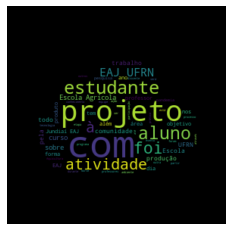

In [464]:
from wordcloud import WordCloud, STOPWORDS
STOPWORDS = ['ver','principal','essa','vez','nas','mas',
             'qual','principal','ele','ter','doença','pois','este',
             'vez','ver principal','artigo principal','já',
             'aos','pode','outro','artigo','desse',
             'alguns','meio','entre','das','podem','esse',
             'seu','também','são','quando','de', 'que','em',
             'os','as','da','como','dos','ou','se','um','uma',
             'para','na','ao','mais','por','não','ainda','muito','sua',
             'a', 'é', 'o', 'e', 'no', 'do']

import matplotlib.pyplot as plt
%matplotlib inline   
# tranforma a saida dos comandos em linha abaixo do código que o produziu
import numpy as np
from PIL import Image

def create_word_cloud(string):
    maskArray = np.array(Image.open("./Nuvem/cloud.jpg"))
    cloud = WordCloud(background_color = "black", max_font_size=50, max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
    cloud.generate(string)
    cloud.to_file("./Nuvem/cloud.png")
    plt.figure()
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
create_word_cloud("".join(texto2))



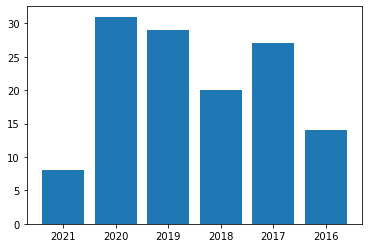

In [462]:
import collections
anos = []
for i in range(len(dataPublicacao)):
    valor = dataPublicacao[i]
    anos.append(valor[-4::])

counter=collections.Counter(anos)
anos = counter.keys()
freq = counter.values()

plt.bar(anos, freq)
plt.show()
